# Introduction to Regression with statsmodels in Python

## Simple Linear Regression Modeling

### A tale of two variables

In [2]:
import pandas as pd

df_trs = pd.read_csv(r'./data/taiwan_real_estate2.csv')
df_trs.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

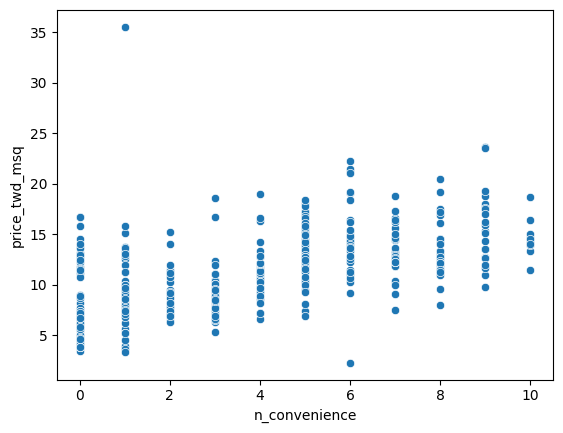

In [4]:
# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=df_trs)


# Show the plot
plt.show()

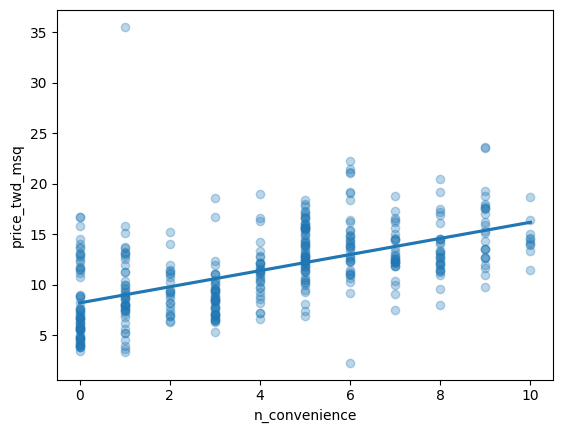

In [10]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(
    x="n_convenience"
    , y="price_twd_msq"
    , data=df_trs
    , ci = None
    , scatter_kws = {'alpha': 0.3}
)

# Show the plot
plt.show()

### Fitting a linear regression

In [11]:
import statsmodels.formula.api as sfa

In [12]:
# Use ols function - Ordinary Least Squared
# Create the model object
mdl_price_vs_conv = sfa.ols('price_twd_msq ~ n_convenience', data=df_trs)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


### Categorical explanatory variables

In [13]:
import seaborn as sns

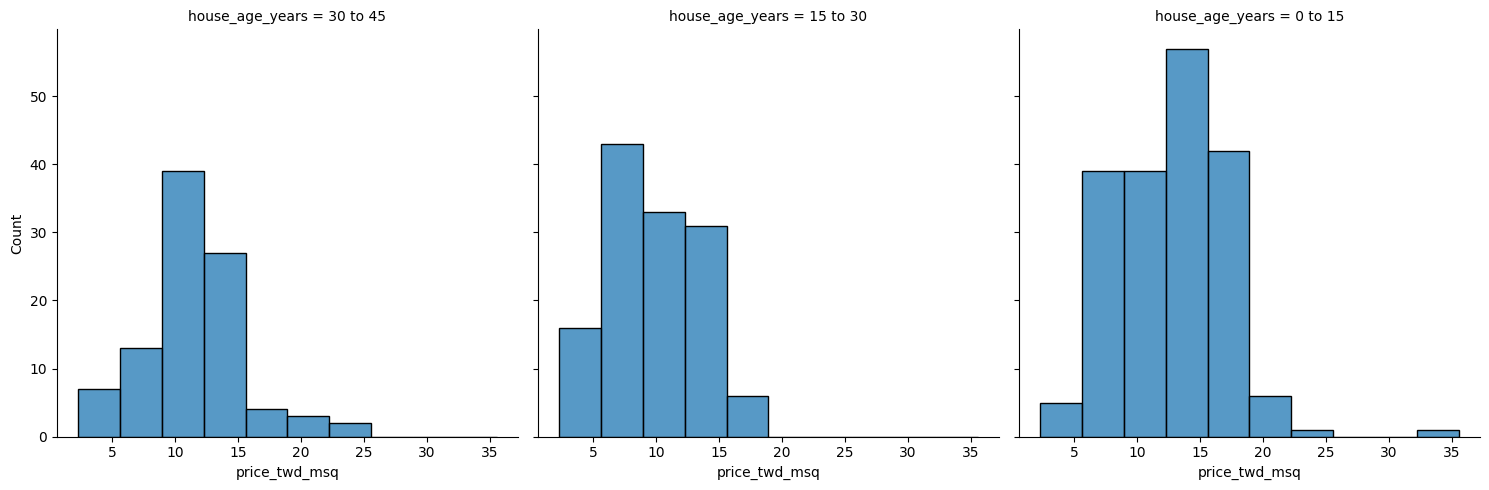

In [14]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(
    data=df_trs
    , x='price_twd_msq'
    , col='house_age_years'
    , col_wrap=3
    , bins=10)

# Show the plot
plt.show();

In [16]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = df_trs.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [18]:
# Create the model, fit it
mdl_price_vs_age = sfa.ols('price_twd_msq ~ house_age_years', data=df_trs).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [21]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = sfa.ols("price_twd_msq ~ house_age_years +0", data=df_trs).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64
